In [2]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import scipy
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]

from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# out_dir='plots'
# if not os.path.isdir(out_dir):
#     os.makedirs(out_dir)
# save = True

In [15]:
valid_data_path_ResNet_B3='/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0/ResNet_B3_with_ieta_iphi_13_channel_massregressor_2024_12_12_12:23:01_GPUS_16'

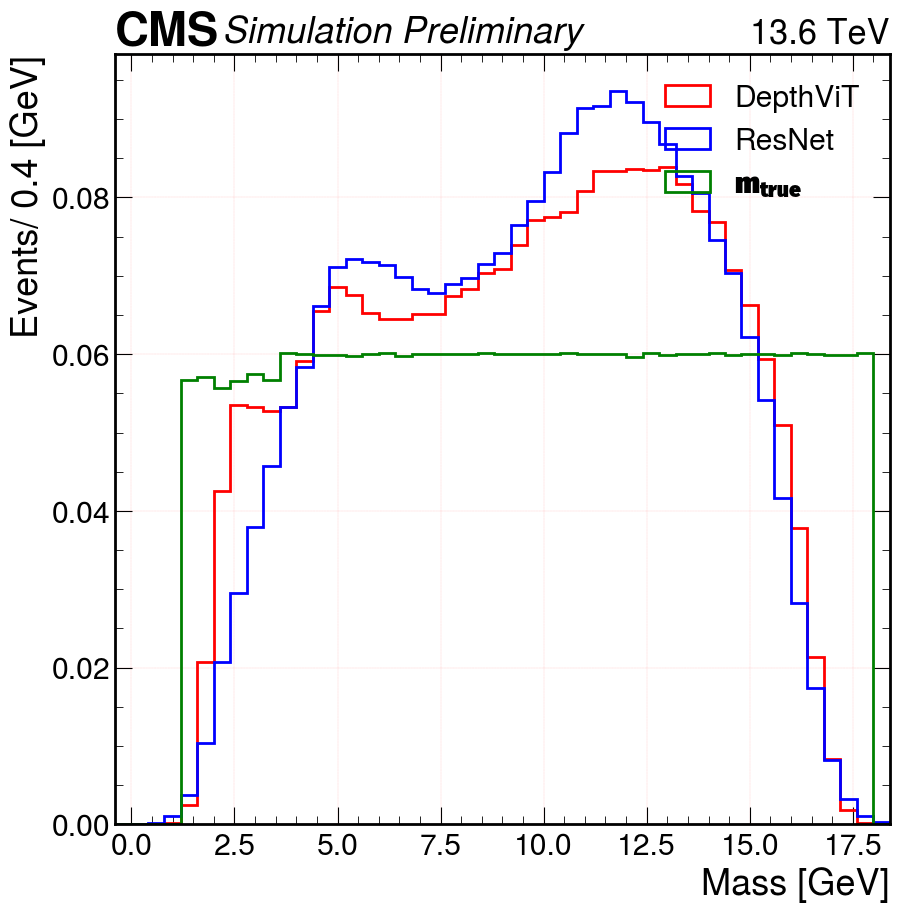

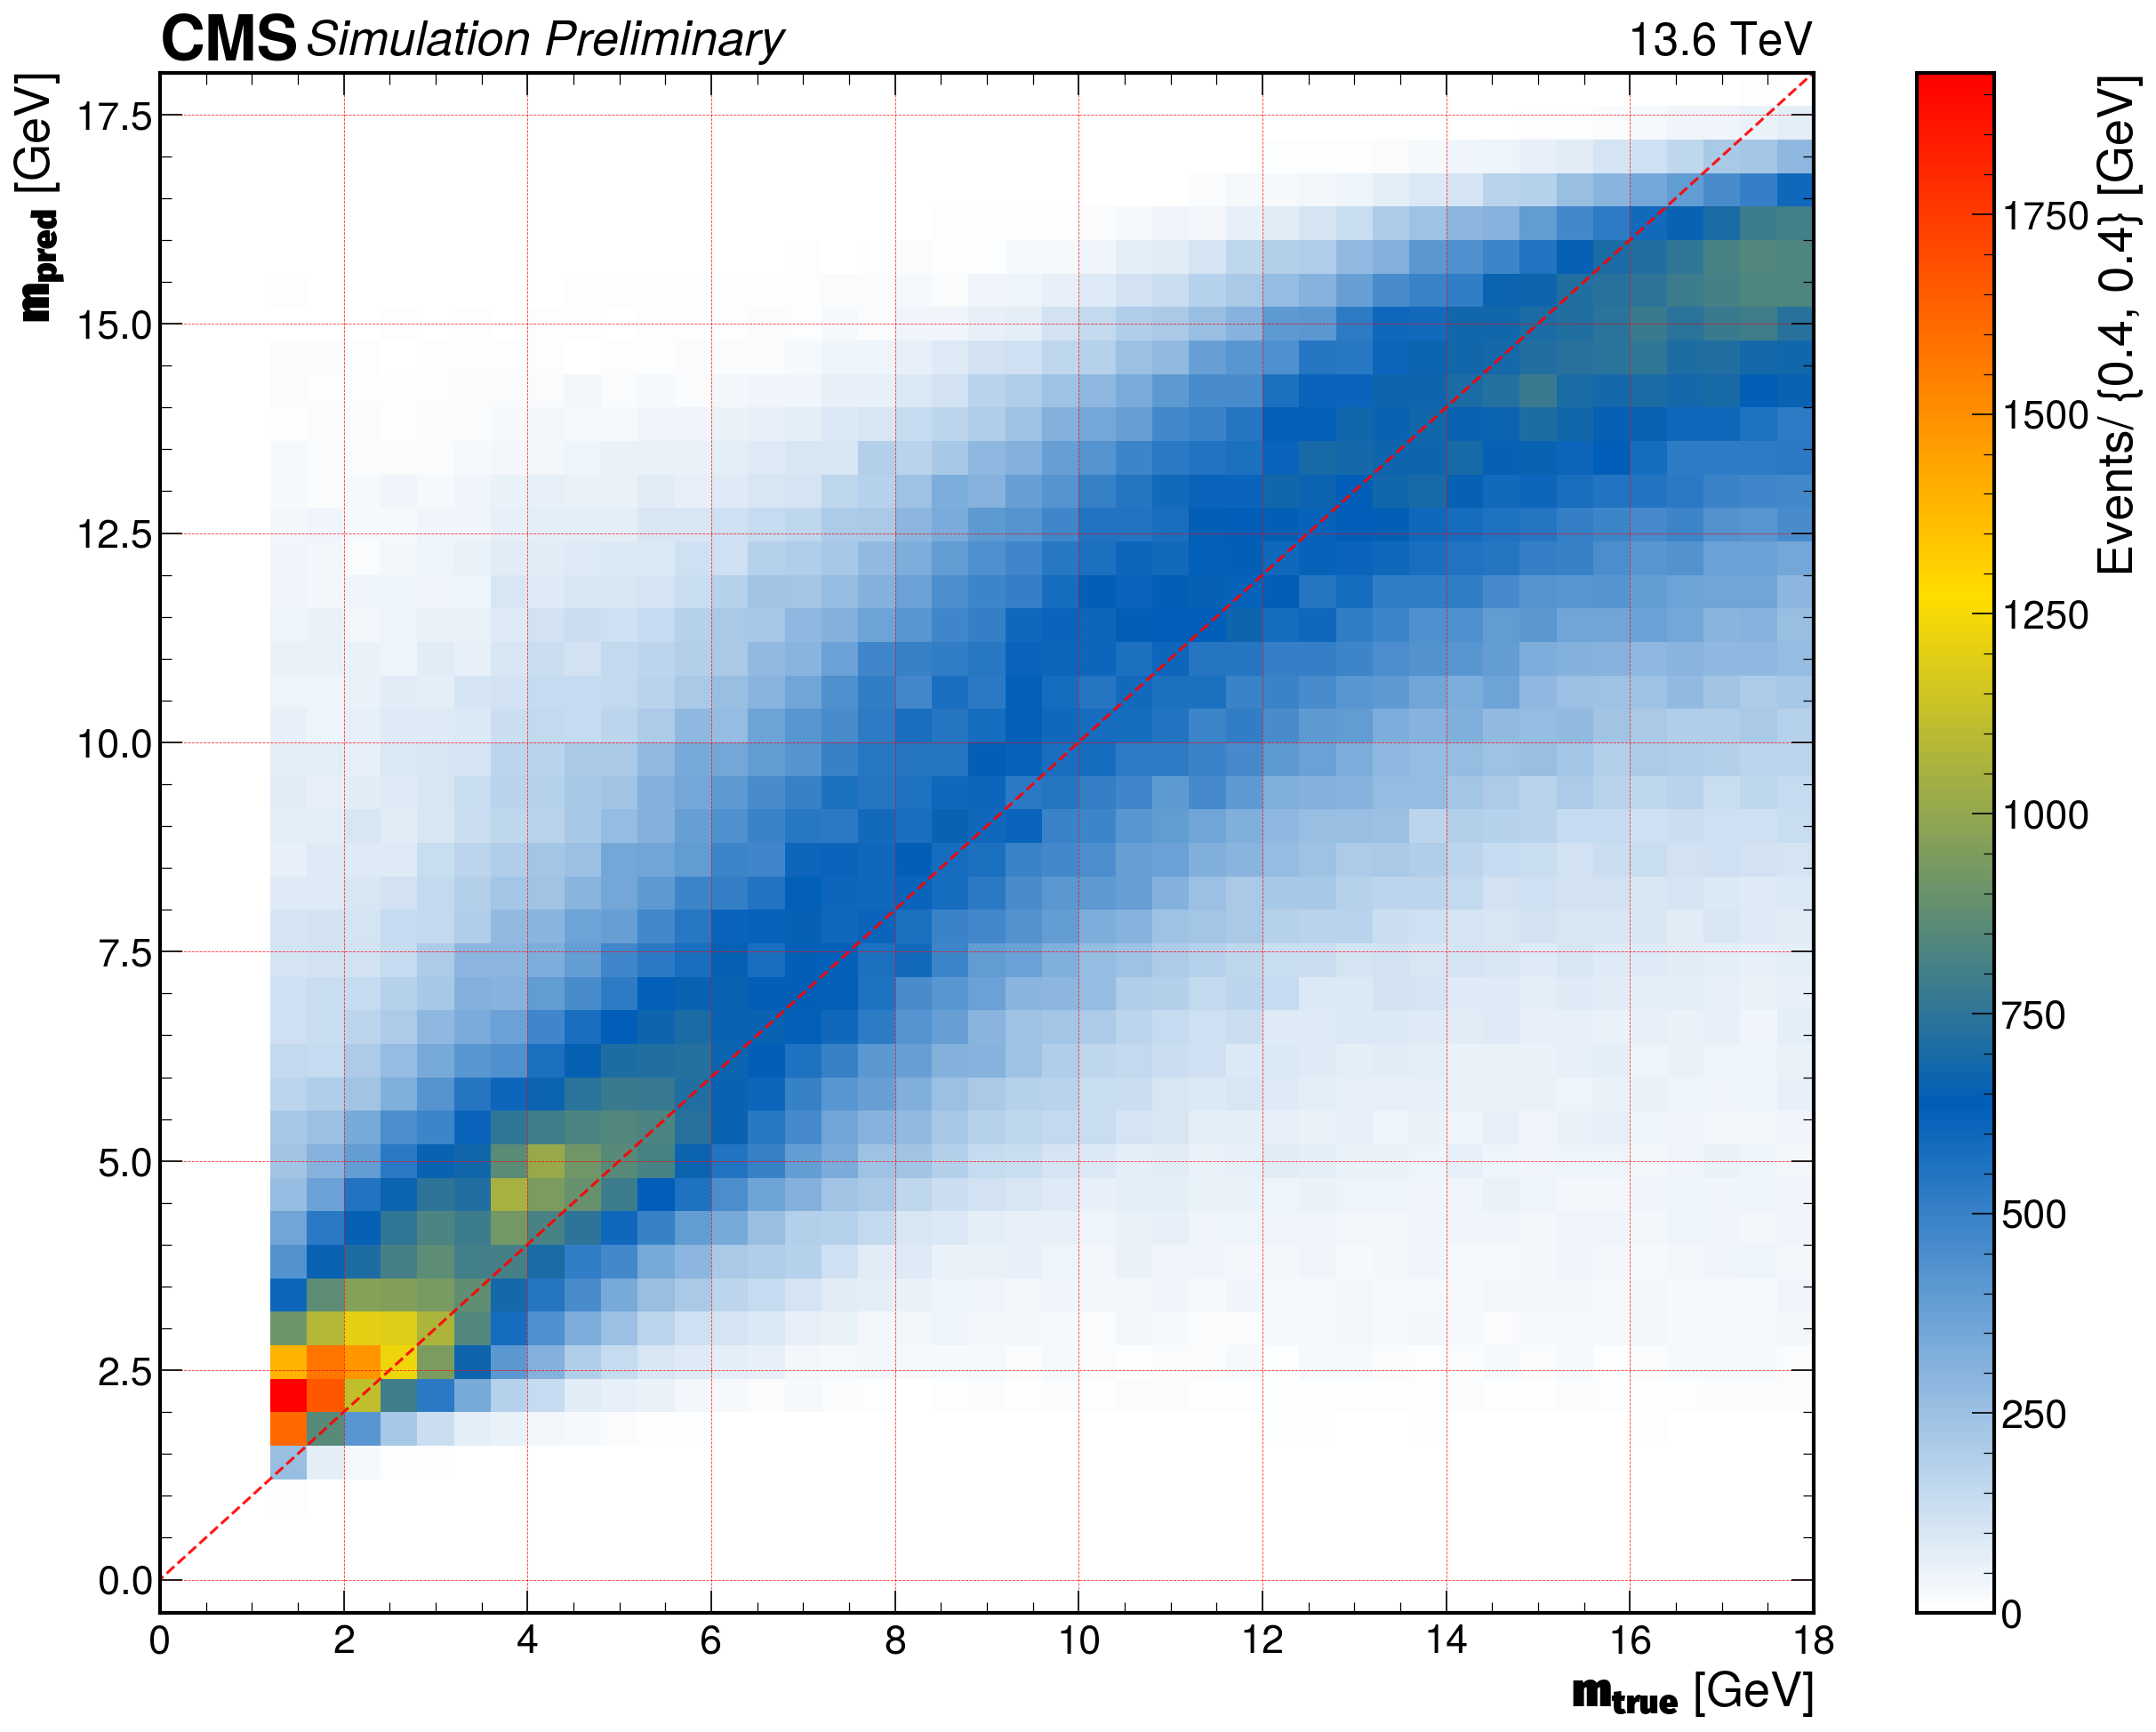

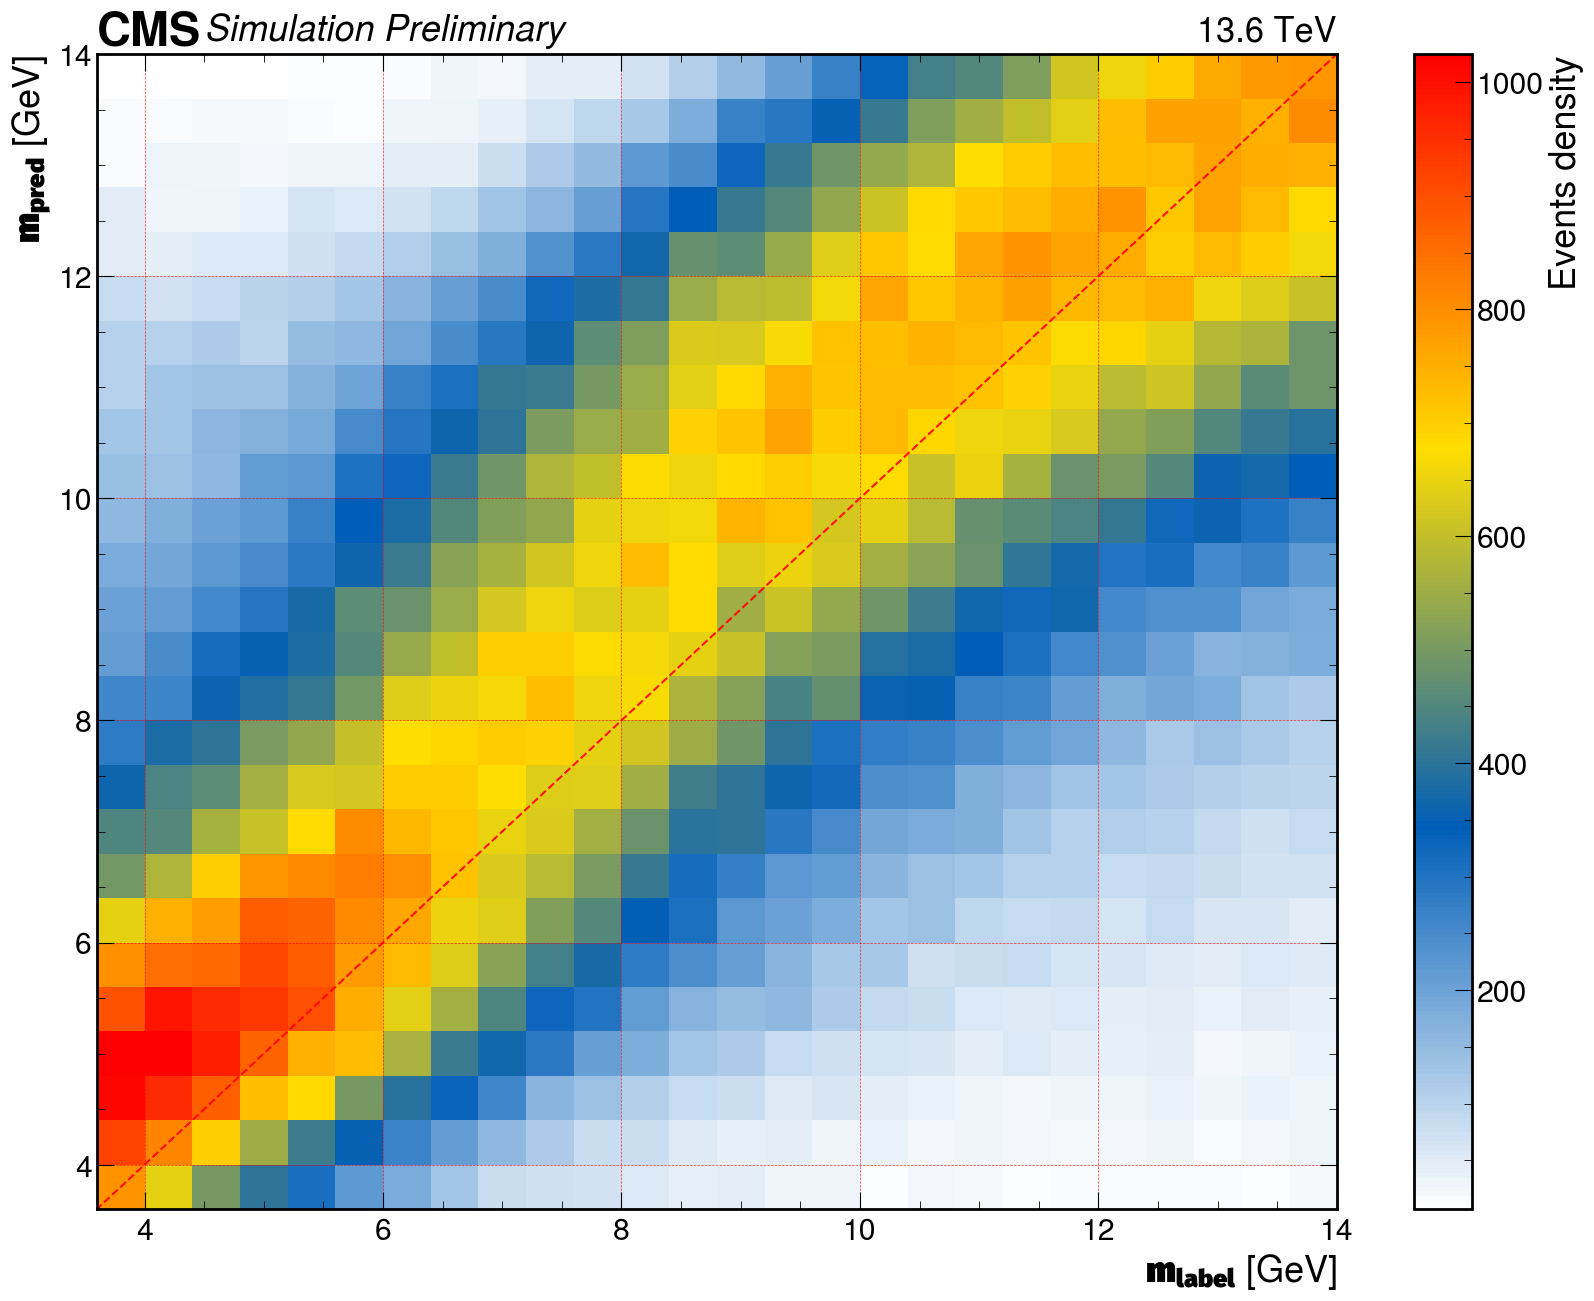

In [31]:
epoch=300
m_true_, m_pred_ = [], []
data_files = glob.glob(f"{valid_data_path_ResNet_B3}/valid_data_epoch_{epoch}/*.pkl")
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)
data_file2 = glob.glob(f'/global/cfs/cdirs/m4392/ereinha/HToAATo4Tau/DepthViT/Inference/Validation/*.pkl')[0]
infile2 = open(f"{data_file2}", "rb")
data2 = pickle.load(infile2)
infile2.close()
m_pred_2 = data2["m_pred"]
m_true_2 = data2["m_true"]

m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_pred_2, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'DepthViT', linestyle='-', color='red', linewidth=2, density=1)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'ResNet', linestyle='-', color='blue', linewidth=2, density=1)
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)),  histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='green', linewidth=2, density=1)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_2), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(3.6, 14.1, .8),size=15)
# plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events density')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()
exit


### Removing the pridiction out of ROI

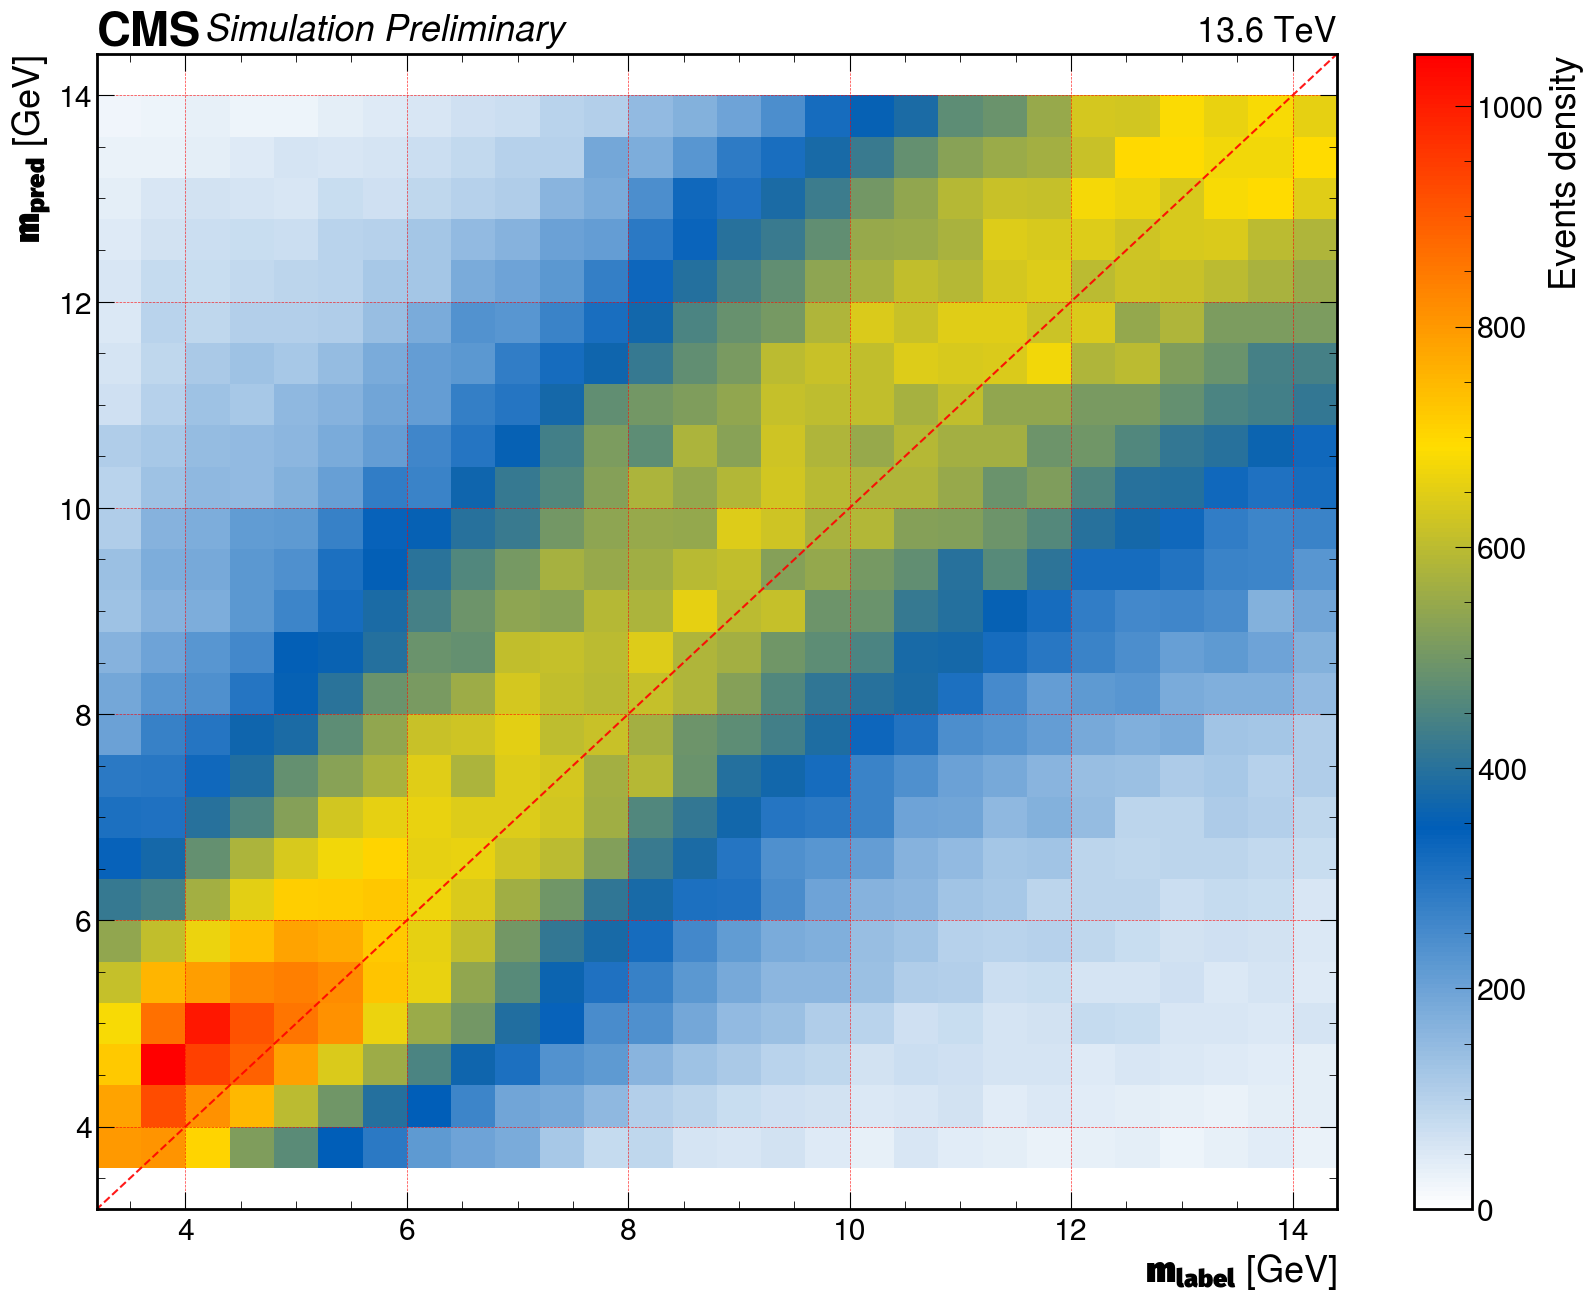

In [45]:
epoch=300
m_true_, m_pred_ = [], []
data_files = glob.glob(f"{valid_data_path_ResNet_B3}/valid_data_epoch_{epoch}/*.pkl")
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)
data_file2 = glob.glob(f'/global/cfs/cdirs/m4392/ereinha/HToAATo4Tau/DepthViT/Inference/Validation/*.pkl')[0]
infile2 = open(f"{data_file2}", "rb")
data2 = pickle.load(infile2)
infile2.close()
m_pred_2 = data2["m_pred"]
m_true_2 = data2["m_true"]


bin_size = 0.4
# Truncated version
m_true_ = m_true_[(m_pred_ > 3.6) & (m_pred_ <14)]
m_pred_ = m_pred_[(m_pred_ > 3.6) & (m_pred_ <14)]
m_true_2 = m_true_2[(m_pred_2 > 3.6) & (m_pred_2 <14)]
m_pred_2 = m_pred_2[(m_pred_2 > 3.6) & (m_pred_2 <14)]
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_2), np.squeeze(m_pred_2), bins=[np.arange(3.2, 14.5, .4), np.arange(3.2, 14.5, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.colorbar().set_label(label='Events density')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()
exit

# Test on single samples

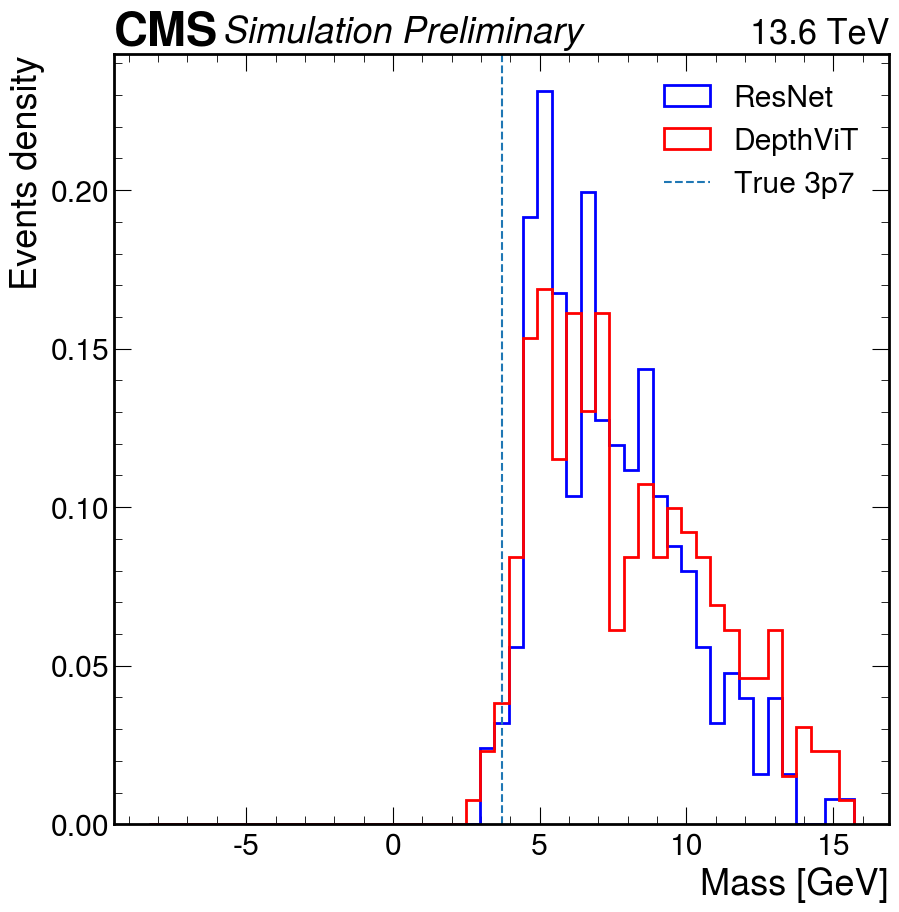

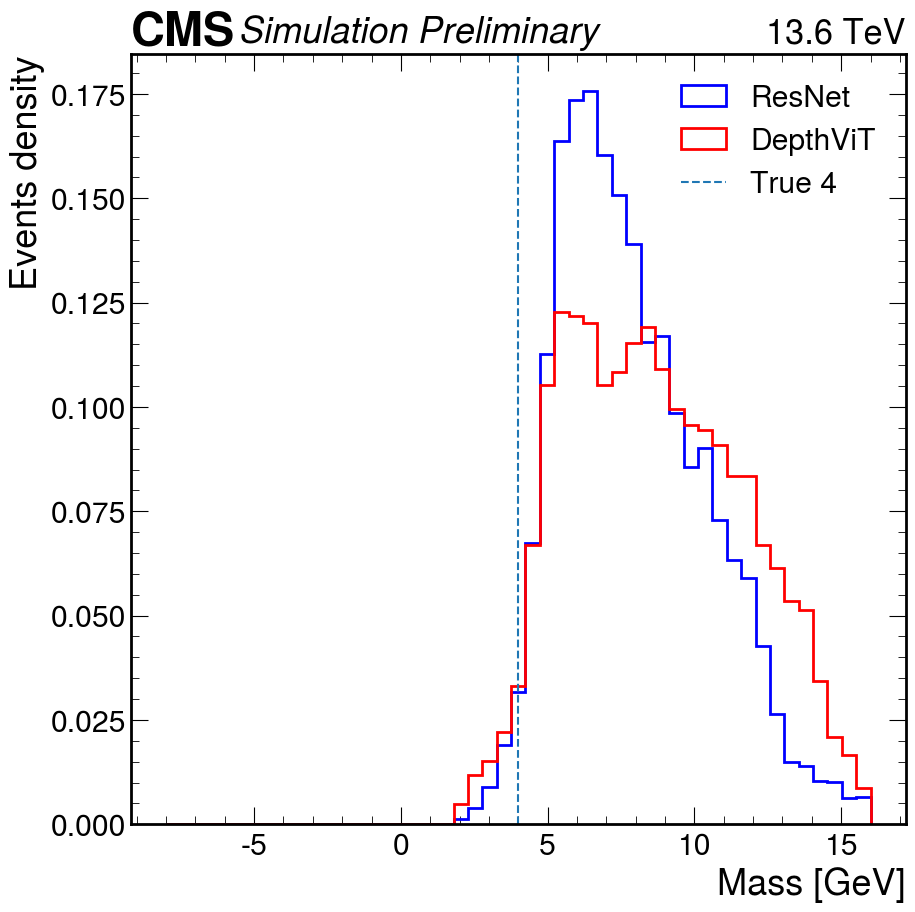

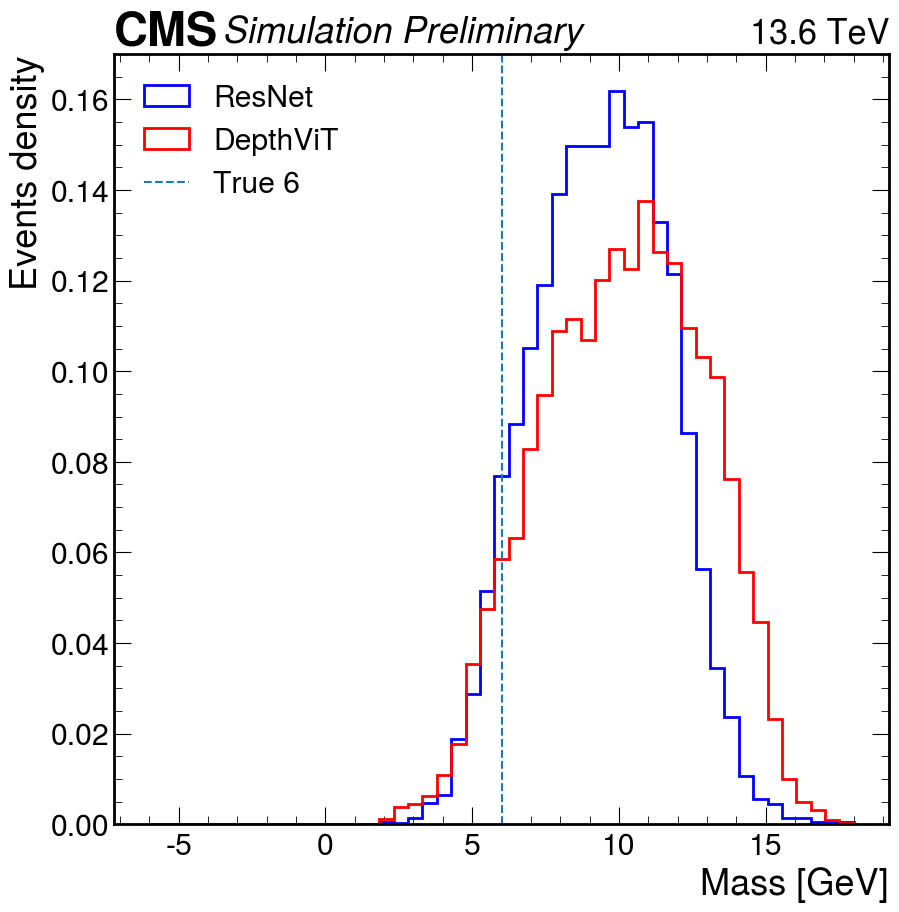

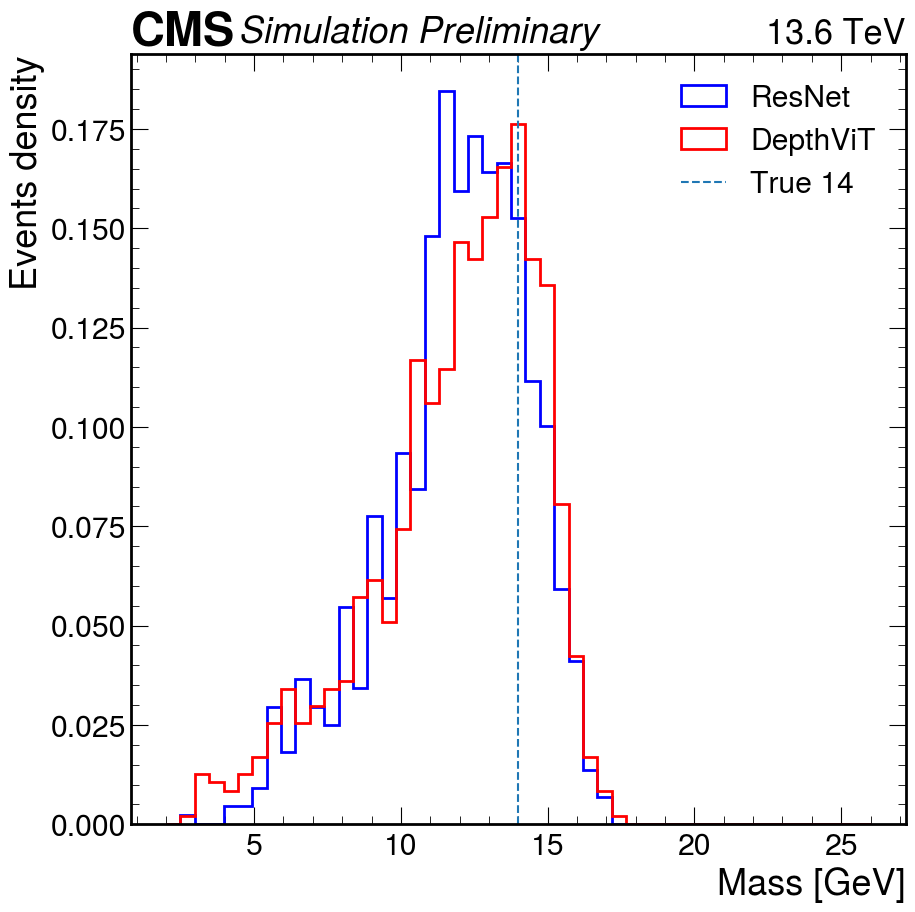

In [24]:
epoch = 300
for Mass in ['3p7', '4', '6', '14']:
    # Mass = '3p7'
    mass ={'3p7':3.7,'4':4, '6':6, '14':14}.get(Mass, None)
    # file={'3p7':,'4':, '6': '14': }.get(Mass,None)
    m_true_, m_pred_ = [], []
    data_files=glob.glob(f"/pscratch/sd/b/bbbam/ResNet_B3_with_ieta_iphi_Nodes_4.0_inference_from_Ruchi_data/*Mass_{Mass}*/*/*.pkl")

    for file in data_files:

        infile = open(f"{file}", "rb")
        data = pickle.load(infile)
        infile.close()
        m_pred_.append(data["m_pred"])

    m_pred = np.concatenate(m_pred_).flatten()
    # print(len(m_pred))
    data_file2 = glob.glob(f'/global/cfs/cdirs/m4392/ereinha/HToAATo4Tau/DepthViT/Inference/Test/data_test_rank_0_epoch_20_IMG_HToAATo4Tau_Hadronic_signal_M{Mass}_GeV_normalized_combined.pkl')[0]
    infile2 = open(f"{data_file2}", "rb")
    data2 = pickle.load(infile2)
    m_pred_2 = data2["m_pred"]
    # print(len(m_pred_2))
    m0_min = 0.8
    m0_max = 18.1
    bin_size = 0.4

    fig, ax = plt.subplots()
    plt.hist(np.array(m_pred).flatten(), range=(mass-12,mass+12), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='ResNet', density=1)
    plt.hist(np.array(m_pred_2).flatten(), range=(mass-12,mass+12), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='r', linewidth=2, label='DepthViT', density=1)
    plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density')
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.show() 
